In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

import seaborn as sns
sns.set() # By default seaborn theme, scaling, and color palette

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
bmp = pd.read_csv('bank-marketing.csv')

In [3]:
# Checking shape : Total number of rows and columns
bmp.shape

(45211, 19)

In [4]:
# Checking data_types
bmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


No null values found.

In [5]:
# Understanding the dataset
bmp.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# Checking Unique values 
bmp.nunique()

age            77
job            12
salary         11
marital         3
education       4
targeted        2
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
response        2
dtype: int64

In [7]:
# Checking duplicates
bmp[bmp.duplicated()]


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [8]:
# Checking for missing values
bmp.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

Since no null values present so no need for missing value treatment.

# Outlier Treatment

Checking for outliers in the numerical columns.

In [9]:
bmp_num = ['age', 'salary', 'balance', 'pdays', 'day', 'duration', 'campaign', 'previous']
    

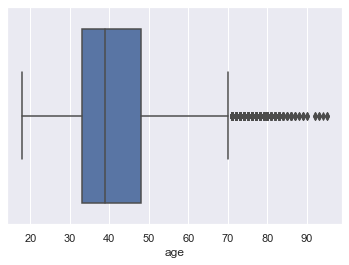

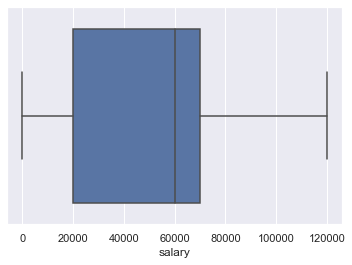

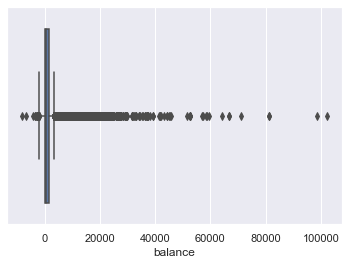

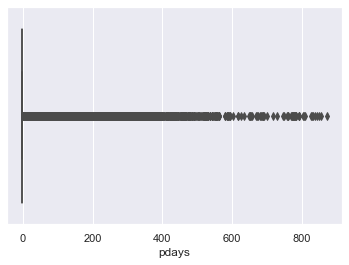

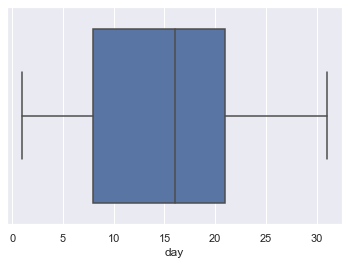

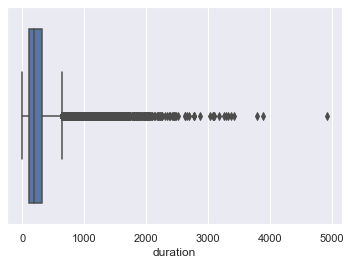

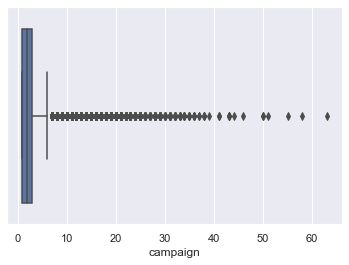

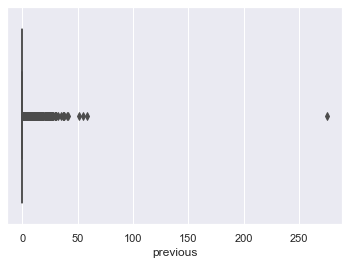

In [10]:
for i in bmp_num:
    sns.boxplot(bmp[i])
    plt.show()

As we can see there are many datapoints that lie outside the interquartile range in most of these columns. Although outliers tends to skew the training process of model , but removing these many datapoints corresponds to a huge loss of information which could have been useful indicator in the training process. Therefore its better to keep the datapoints as it is and not to remove it.

## Task to Perform on specific columns

In [11]:
bmp.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [12]:
bmp['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [13]:
print('Mean is', bmp['pdays'].mean())
print('Median is', bmp['pdays'].median())
print('Mode is', bmp['pdays'].mode()[0])

Mean is 40.19782796222158
Median is -1.0
Mode is -1


<AxesSubplot:xlabel='pdays', ylabel='Density'>

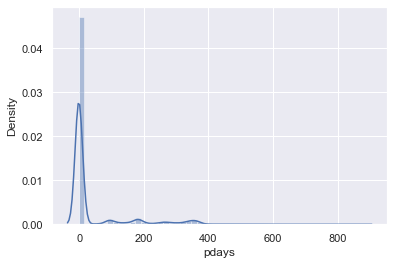

In [14]:
sns.set_style('darkgrid')
sns.distplot(bmp['pdays'])

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?¶


In [15]:
# Since for relevant pdays, need to drop -1, as the mean, median and mode does look out of context as most of the data points areallocated around -1.0
bmp1 = bmp[bmp['pdays'] != -1]
bmp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8257 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8257 non-null   int64 
 1   job        8257 non-null   object
 2   salary     8257 non-null   int64 
 3   marital    8257 non-null   object
 4   education  8257 non-null   object
 5   targeted   8257 non-null   object
 6   default    8257 non-null   object
 7   balance    8257 non-null   int64 
 8   housing    8257 non-null   object
 9   loan       8257 non-null   object
 10  contact    8257 non-null   object
 11  day        8257 non-null   int64 
 12  month      8257 non-null   object
 13  duration   8257 non-null   int64 
 14  campaign   8257 non-null   int64 
 15  pdays      8257 non-null   int64 
 16  previous   8257 non-null   int64 
 17  poutcome   8257 non-null   object
 18  response   8257 non-null   object
dtypes: int64(8), object(11)
memory usage: 1.3+ MB


In [16]:
print('Mean is', bmp1['pdays'].mean())
print('Median is', bmp1['pdays'].median())
print('Mode is', bmp1['pdays'].mode()[0])


Mean is 224.57769165556496
Median is 194.0
Mode is 182


<AxesSubplot:xlabel='pdays', ylabel='Density'>

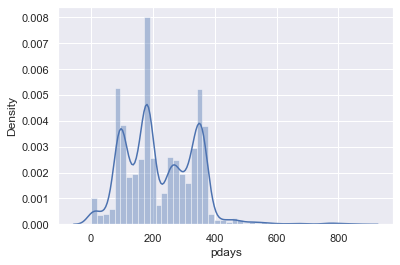

In [17]:
sns.set_style('darkgrid')
sns.distplot(bmp1['pdays'])

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

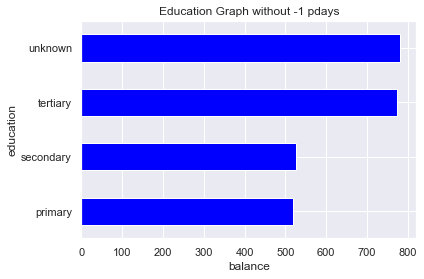

Unknown has highest median 782.0


In [18]:
plt.title('Education Graph without -1 pdays')
plt.xlabel('balance')
bmp2 = bmp1.groupby(['education']).median()['balance']
bmp2.plot(kind='barh',color='blue')
plt.show()

print('Unknown has highest median',bmp2.max())

### Make a box plot for pdays. Do you see any outliers?


Boxplot without -1 pdays


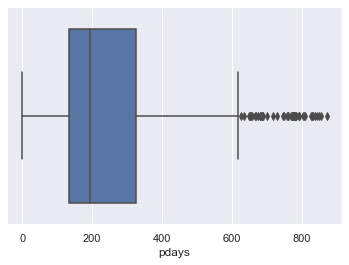

In [19]:
print('Boxplot without -1 pdays')
sns.boxplot(bmp1['pdays'])
plt.show()

Boxplot with -1 pdays


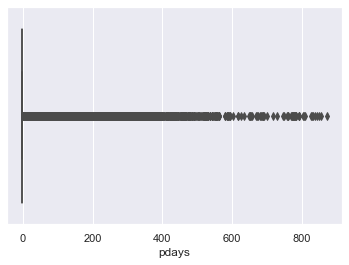

In [20]:
print('Boxplot with -1 pdays')
sns.boxplot(bmp['pdays'])
plt.show()

A clear comparison and difference can be seen with the outlier boxplot as how data inference changes when -1 pdays were deleted.

Boxplot with no Outliers


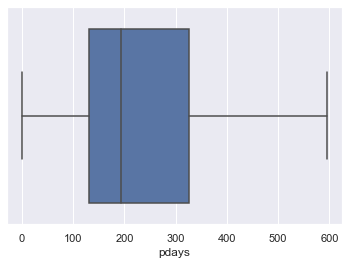

In [21]:
# Handling the Outliers
bmp2 = bmp1[bmp1['pdays'] >= 600]
bmp1 = bmp1.drop(bmp2.index, axis=0)

print('Boxplot with no Outliers')
sns.boxplot(bmp1['pdays'])
plt.show()

In [22]:
# New Data after filtering out ouliers & -1 pdays
bmp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8205 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8205 non-null   int64 
 1   job        8205 non-null   object
 2   salary     8205 non-null   int64 
 3   marital    8205 non-null   object
 4   education  8205 non-null   object
 5   targeted   8205 non-null   object
 6   default    8205 non-null   object
 7   balance    8205 non-null   int64 
 8   housing    8205 non-null   object
 9   loan       8205 non-null   object
 10  contact    8205 non-null   object
 11  day        8205 non-null   int64 
 12  month      8205 non-null   object
 13  duration   8205 non-null   int64 
 14  campaign   8205 non-null   int64 
 15  pdays      8205 non-null   int64 
 16  previous   8205 non-null   int64 
 17  poutcome   8205 non-null   object
 18  response   8205 non-null   object
dtypes: int64(8), object(11)
memory usage: 1.3+ MB


## Bi-Variate Analysis | EDA¶

### Convert the response variable to a convenient form

In [23]:
bmp['response'].value_counts()

no     39922
yes     5289
Name: response, dtype: int64

In [24]:
bmp1['response'] = np.where(bmp1['response']=='no',0,1)

In [25]:
bmp1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


### Make suitable plots for associations with numerical features and categorical features’

Identifying categorical and numerical columns

In [26]:
cols = bmp1.columns.to_list()
num_cols= bmp1._get_numeric_data().columns.to_list()
cat_cols = list(set(cols) - set(num_cols))

print('Numerical Columns')
print(num_cols)
print('\nCategorical Columns')
print(cat_cols)

Numerical Columns
['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']

Categorical Columns
['default', 'loan', 'housing', 'job', 'marital', 'education', 'poutcome', 'month', 'contact', 'targeted']


Visualizing Numerical Features with Response¶

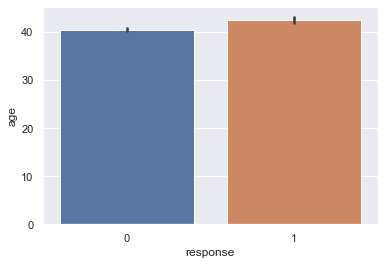

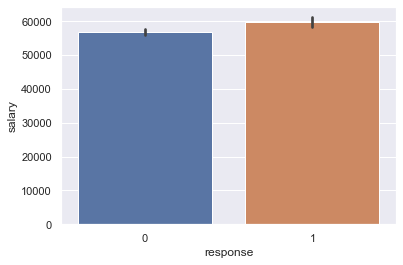

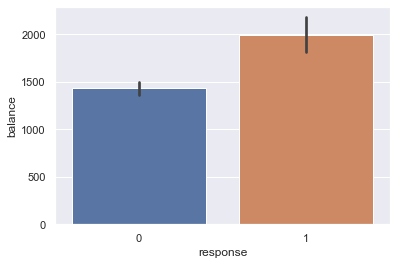

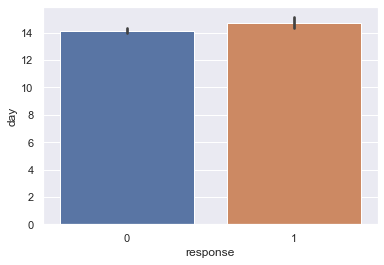

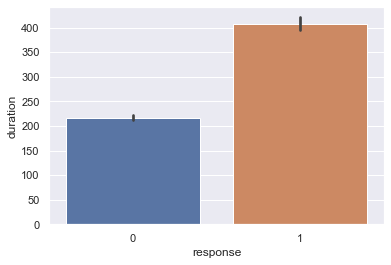

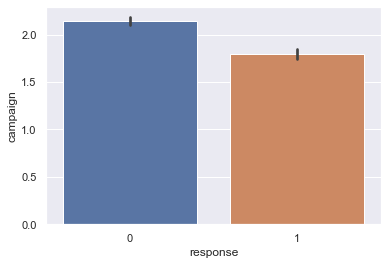

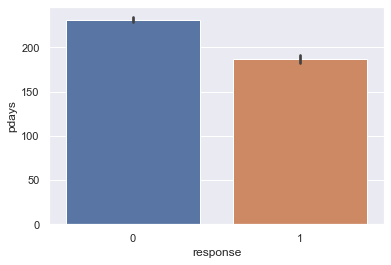

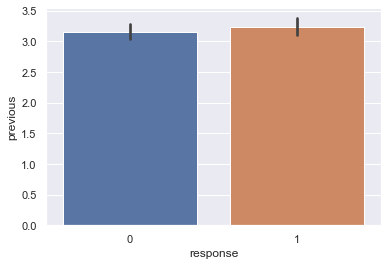

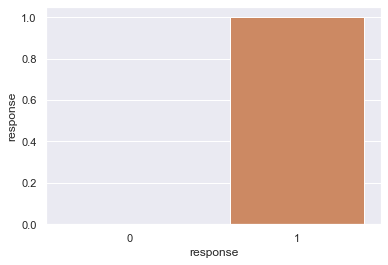

In [27]:
for i in bmp1[num_cols]:
    sns.barplot(bmp1['response'],bmp1[i])
    plt.show()


Visualizing Categorical Features with Response


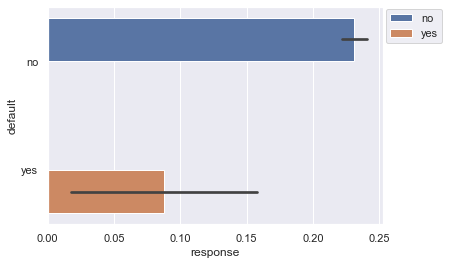

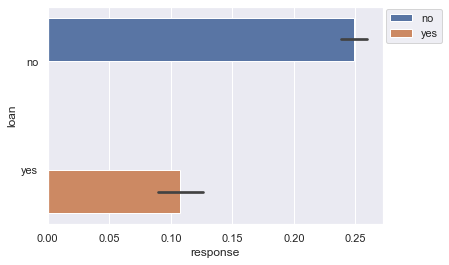

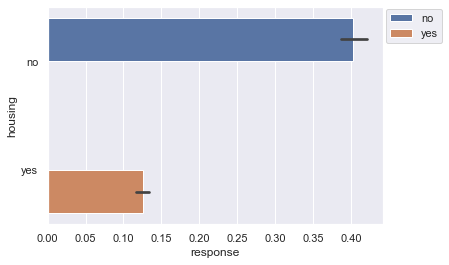

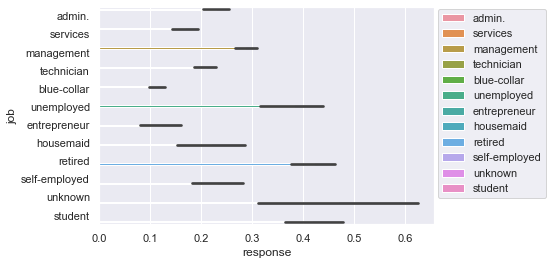

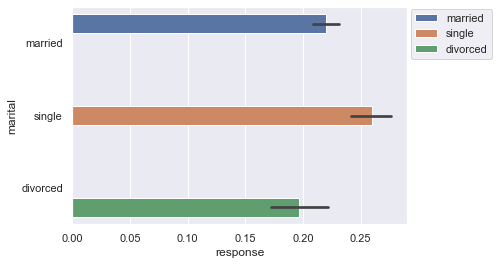

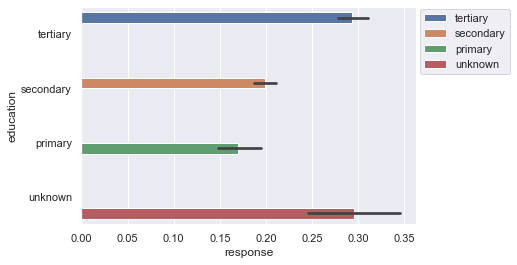

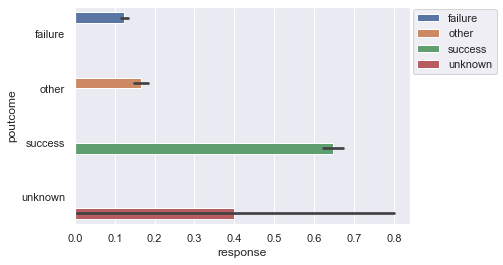

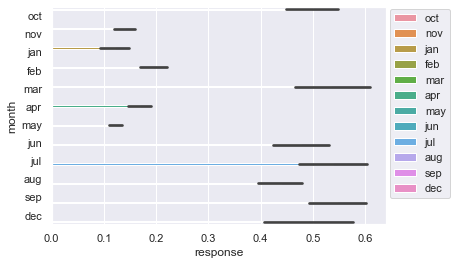

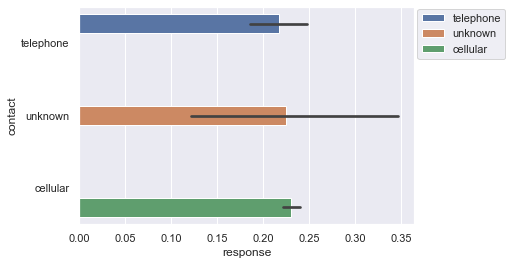

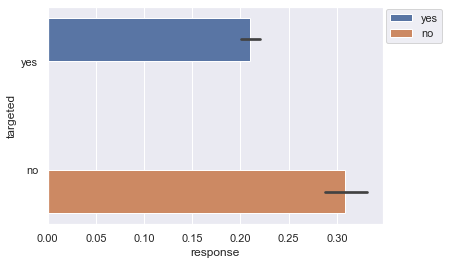

In [28]:
for i in bmp1[cat_cols]:
    sns.barplot(bmp1['response'],bmp1[i],hue=bmp1[i])
    plt.legend(bbox_to_anchor=(1.01,.99),borderaxespad=0,loc=2)
    plt.show()

### Are the features about the previous campaign data useful? Are pdays and poutcome associated with the target?

 Yes previous campaign data is useful & pdays, poutcome is associated with the target variable 'response'.

The -1 pdays or missing values or outliers are filtered out as we would not be using that in Modelling.

# EDA

Responce feature tells if has the client subscribed a term deposit or not.

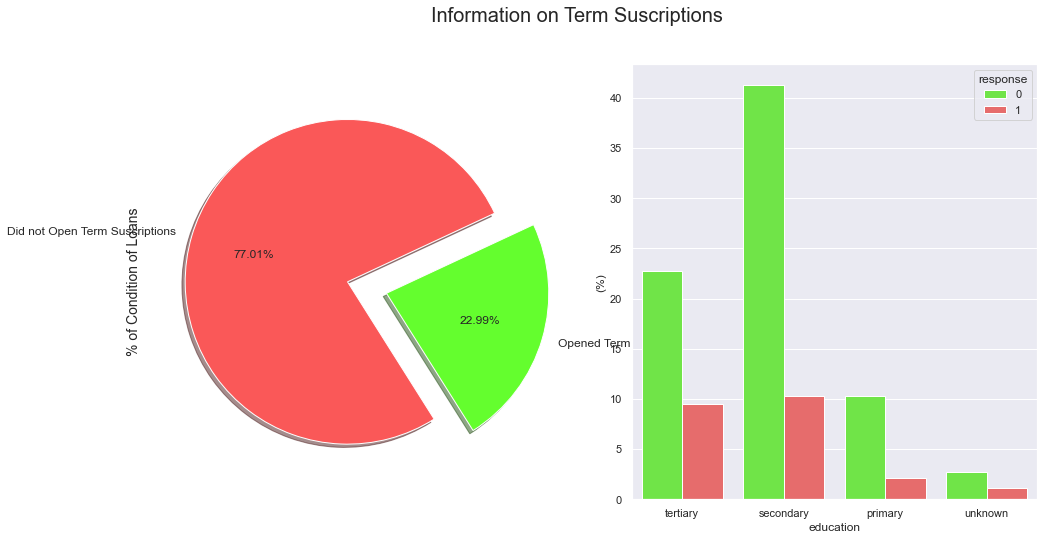

In [29]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

bmp1["response"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="response", data=bmp1, palette=palette, estimator=lambda x: len(x) / len(bmp1) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(bmp1["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

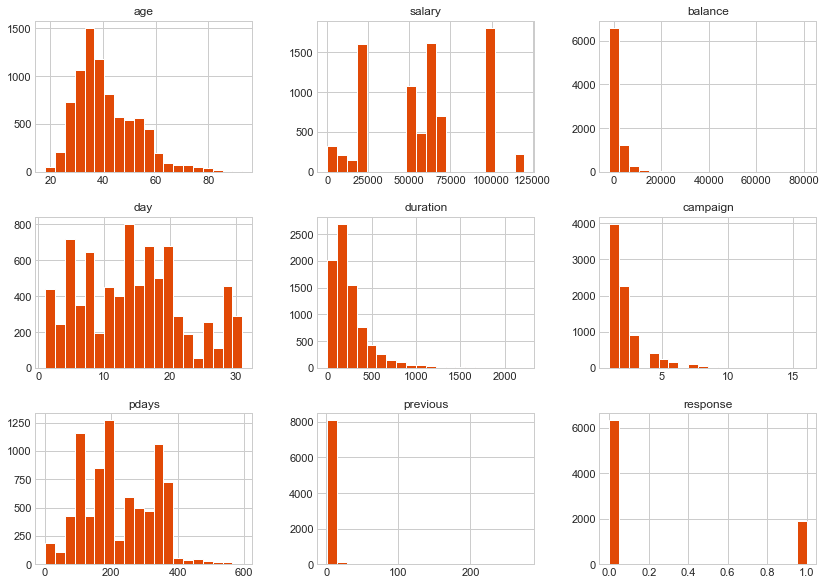

In [30]:
# Let's see how the numeric data is distributed.

plt.style.use('seaborn-whitegrid')

bmp1.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

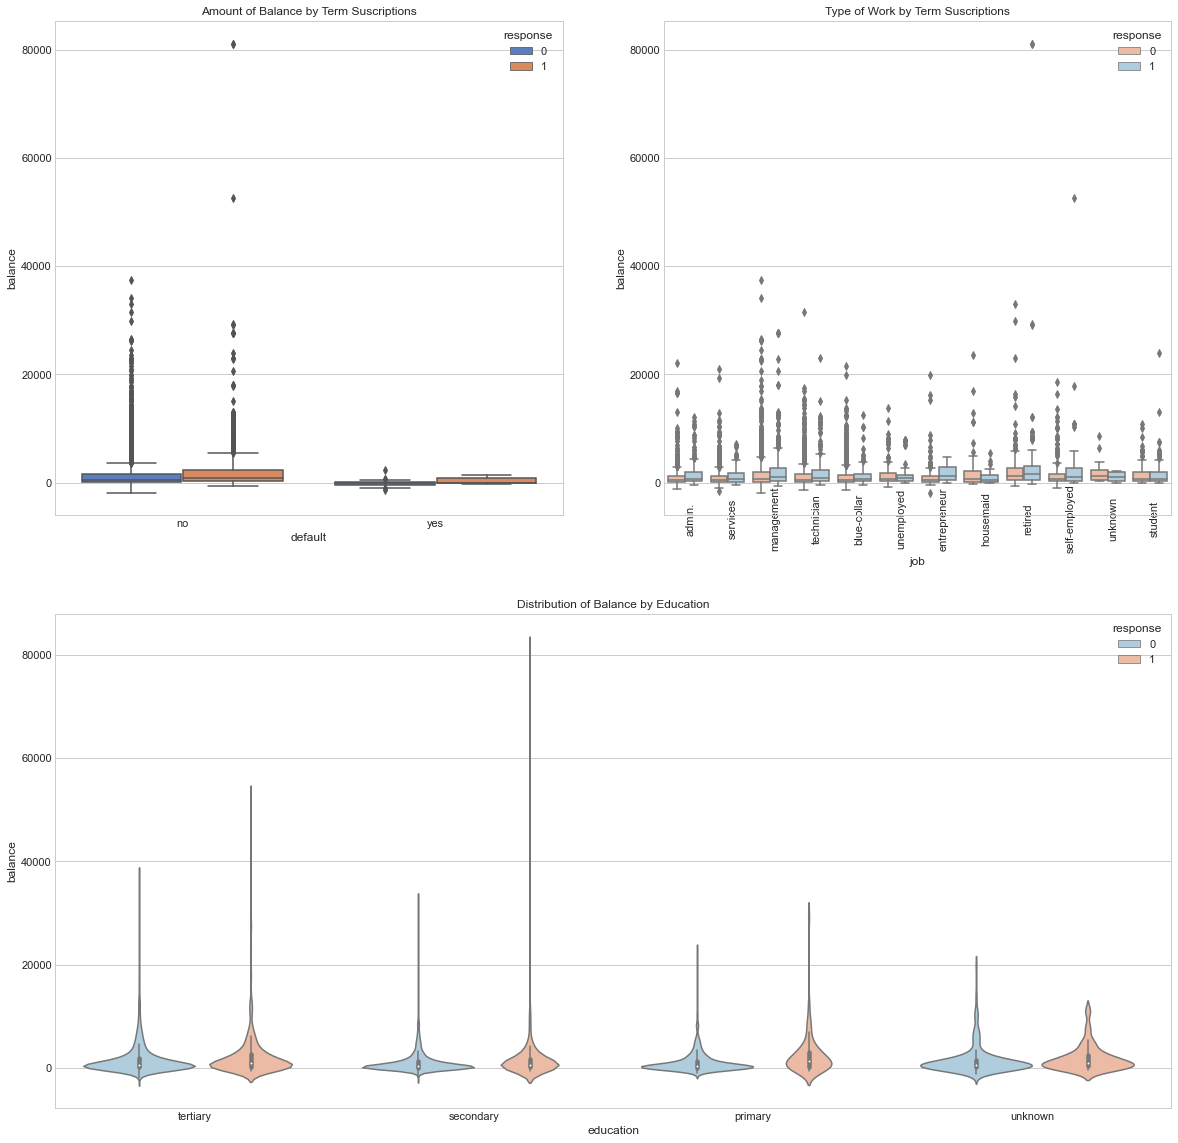

In [31]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="response",
                    data=bmp1, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(bmp1["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="response",
                 data=bmp1, palette="RdBu", ax=ax2)

g1.set_xticklabels(bmp1["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=bmp1, x="education", y="balance", hue="response", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

In [32]:
bmp1['response'].value_counts()

0    6319
1    1886
Name: response, dtype: int64

#### The necessary transformations for the categorical variables and the numeric variables

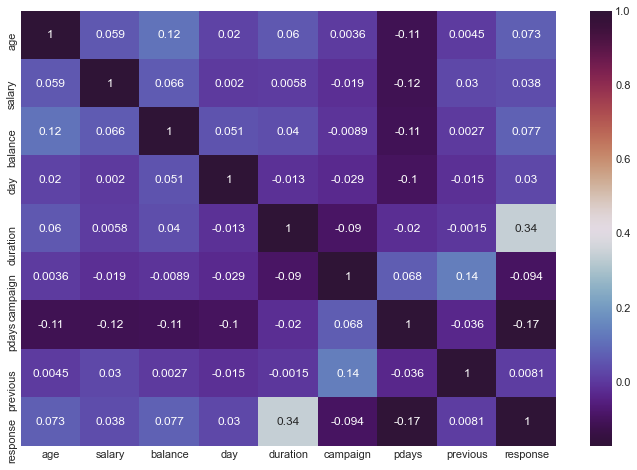

In [33]:
# Checking for Correlation on the Resultant Data
plt.figure(figsize=(12,8))
corr = bmp1.corr()
sns.heatmap(corr,annot=True,cmap= 'twilight_shifted')
plt.show()

Before the predictive modeling part, Lets perform –
- The necessary transformations for the categorical variables and the numeric variables
- Handle variables corresponding to the previous campaign
- Train test split

In [34]:
# Describing the resultant data 
bmp1.reset_index(inplace = True)
bmp1.drop(['index'],axis=1,inplace=True)
bmp1.describe()

,age,salary,balance,day,duration,campaign,pdays,previous,response
count,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000
mean,40.955759,57552.833638,1560.162949,14.284217,260.359902,2.060695,221.312736,3.167093,0.229860
std,11.436643,31769.246532,3068.366410,7.918706,235.389504,1.564156,107.994505,4.515102,0.420768
min,18.000000,0.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,33.000000,20000.000000,167.000000,7.000000,113.000000,1.000000,131.000000,1.000000,0.000000
50%,38.000000,60000.000000,602.000000,14.000000,193.000000,2.000000,193.000000,2.000000,0.000000
75%,48.000000,70000.000000,1752.000000,20.000000,324.000000,2.000000,326.000000,4.000000,0.000000
max,93.000000,120000.000000,81204.000000,31.000000,2219.000000,16.000000,595.000000,275.000000,1.000000


In [35]:
# Understanding the resultant data 
bmp1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
1,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
2,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
3,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
4,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


In [36]:
# Since contact,marital,education,month,poutcome,loan,job,default,housing,targeted column is categorical so firstly need to handle it
bmp1[['education', 'contact', 'default', 'loan', 'housing', 'targeted', 'month', 'poutcome', 'job', 'marital']].nunique()

education     4
contact       3
default       2
loan          2
housing       2
targeted      2
month        12
poutcome      4
job          12
marital       3
dtype: int64

In [37]:
# First need to handle the categorical columns
bmp1[cat_cols].nunique()

default       2
loan          2
housing       2
job          12
marital       3
education     4
poutcome      4
month        12
contact       3
targeted      2
dtype: int64

## Data Preparation

In [38]:
bmp1.dtypes

age           int64
job          object
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response      int32
dtype: object

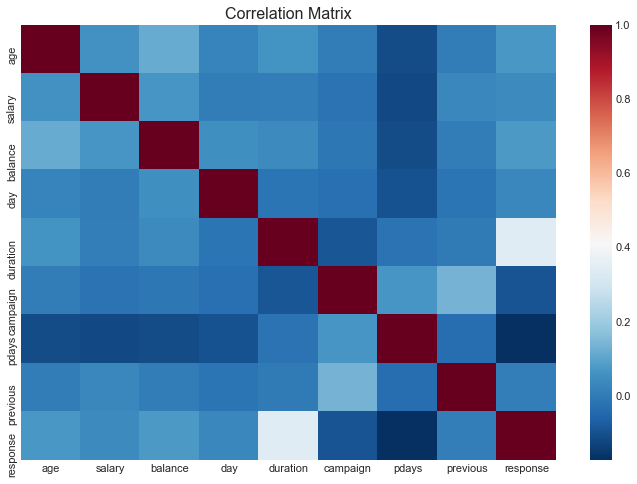

In [39]:
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on response


from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
bmp1['response'] = LabelEncoder().fit_transform(bmp1['response'])

# Separate both dataframes into 
numeric_df = bmp1.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()



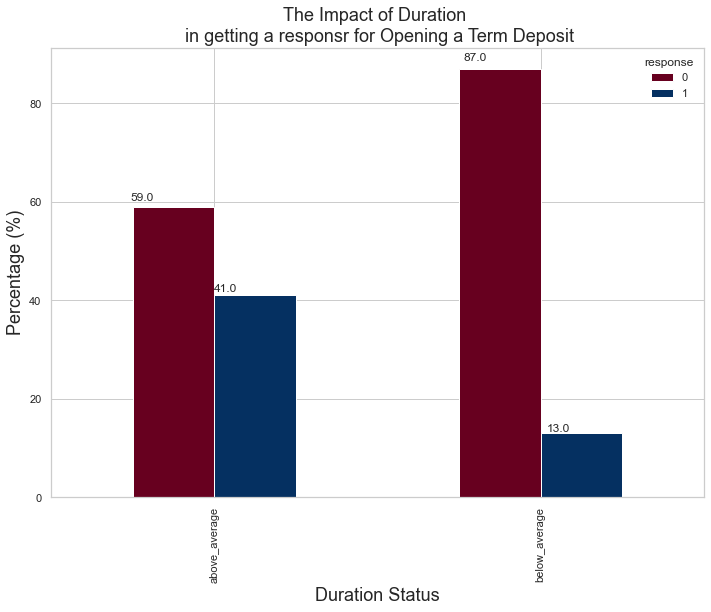

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = bmp1['duration'].mean()

lst = [bmp1]
bmp1["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(bmp1['duration_status'], bmp1['response']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in getting a responsr for Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

In [41]:
# The 'response' feature already been changed to relevant value for '0', not responded and '1', for responded.
bmp1['response'].value_counts()/len(bmp1)

0    0.77014
1    0.22986
Name: response, dtype: float64

In [42]:
bmp1['housing'].value_counts()/len(bmp1)

yes    0.6234
no     0.3766
Name: housing, dtype: float64

In [43]:
bmp1['loan'].value_counts()/len(bmp1)

no     0.864107
yes    0.135893
Name: loan, dtype: float64

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_set, test_set in stratified.split(bmp1, bmp1["loan"]):
    stratified_train = bmp1.loc[train_set]
    stratified_test =bmp1.loc[test_set]
    
stratified_train["loan"].value_counts()/len(bmp1)
stratified_test["loan"].value_counts()/len(bmp1)


no     0.259232
yes    0.040829
Name: loan, dtype: float64

In [45]:
# Separate the labels and the features.
train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test
train_data.shape
test_data.shape
train_data['response'].value_counts()

0    4432
1    1311
Name: response, dtype: int64

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [48]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, no need to try to
# understand every line.
# Code reference Hands on Machine Learning with Scikit Learn and Tensorflow by Aurelien Geron.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5743 entries, 6775 to 4344
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              5743 non-null   int64 
 1   job              5743 non-null   object
 2   salary           5743 non-null   int64 
 3   marital          5743 non-null   object
 4   education        5743 non-null   object
 5   targeted         5743 non-null   object
 6   default          5743 non-null   object
 7   balance          5743 non-null   int64 
 8   housing          5743 non-null   object
 9   loan             5743 non-null   object
 10  contact          5743 non-null   object
 11  day              5743 non-null   int64 
 12  month            5743 non-null   object
 13  duration         5743 non-null   int64 
 14  campaign         5743 non-null   int64 
 15  pdays            5743 non-null   int64 
 16  previous         5743 non-null   int64 
 17  poutcome         5743 non-null

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Making pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "balance", "day", "campaign", "pdays", "previous","duration"])),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["job", "education", "marital", "default", "housing", "loan", "contact", "month",
                                     "poutcome"])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [52]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[ 1.21561126,  0.60683053, -0.53294168, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16840985,  0.59180639, -0.28086755, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87879156,  0.77209611,  0.85346602, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.79152477,  0.05061757,  0.09724364, ...,  1.        ,
         0.        ,  0.        ],
       [-0.79152477,  0.79575114, -0.91105287, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52972442, -0.39115617, -0.15483049, ...,  1.        ,
         0.        ,  0.        ]])

In [53]:
y_train = train_data['response']
y_test = test_data['response']
y_train.shape

(5743,)

In [54]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)
y_train_yes = (y_train == 1)
y_train
y_train_yes

array([ True,  True, False, ..., False, False, False])

In [55]:
# Time for Classification Models
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18)
    }

In [56]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,2)), columns = ['classifier', 'train_score'])
    count = 0
    for key, classifier in dict_classifiers.items():
       
        classifier.fit(X_train, Y_train)
       
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
       
        if verbose:
            print("trained {c}".format(c=key))
        count+=1
    return df_results

In [57]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression
trained Decision Tree
trained Random Forest
            classifier  train_score
1        Decision Tree     1.000000
2        Random Forest     0.997040
0  Logistic Regression     0.843636


### Avoiding Overfitting:
- Brief Description of Overfitting?

This is an error in the modeling algorithm that takes into consideration random noise in the fitting process rather than the pattern itself. You can see that this occurs when the model gets an awsome score in the training set but when we use the test set (Unknown data for the model) we get an awful score. This is likely to happen because of overfitting of the data (taking into consideration random noise in our pattern). What we want our model to do is to take the overall pattern of the data in order to correctly classify whether a potential client will suscribe to a term deposit or not. In the examples above, it is most likely that the Decision Tree Classifier and Random Forest classifiers are overfitting since they both give us nearly perfect scores (100% and 99%) accuracy scores.

### How can we avoid Overfitting?


The best alternative to avoid overfitting is to use cross validation. Taking the training test and splitting it. For instance, if we split it by 3, 2/3 of the data or 66% will be used for training and 1/3 33% will be used or testing and we will do the testing process three times. This algorithm will iterate through all the training and test sets and the main purpose of this is to grab the overall pattern of the data.

In [59]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Dec Tree',  'Rand FC'], 
    'Crossval Mean Scores': [log_reg_mean, tree_mean, rand_mean]}

result_df = pd.DataFrame(data=d)


In [60]:
# All of our 3 models perform well but comparing logistic and random forest , since the train score of random forest classifier has performed better than logistic so, we will stick to that for now.
# Cross val score estimates the expected accuracy of the model out of training data.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
2,Rand FC,0.841547
0,Logistic Reg.,0.839981
1,Dec Tree,0.795580


In [61]:
# Cross validate our Random forestClassifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rand_clf, X_train, y_train, cv=3)

In [62]:
from sklearn.metrics import accuracy_score
rand_clf.fit(X_train, y_train)
print ("Random Forest Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Random Forest Classifier accuracy is 0.85


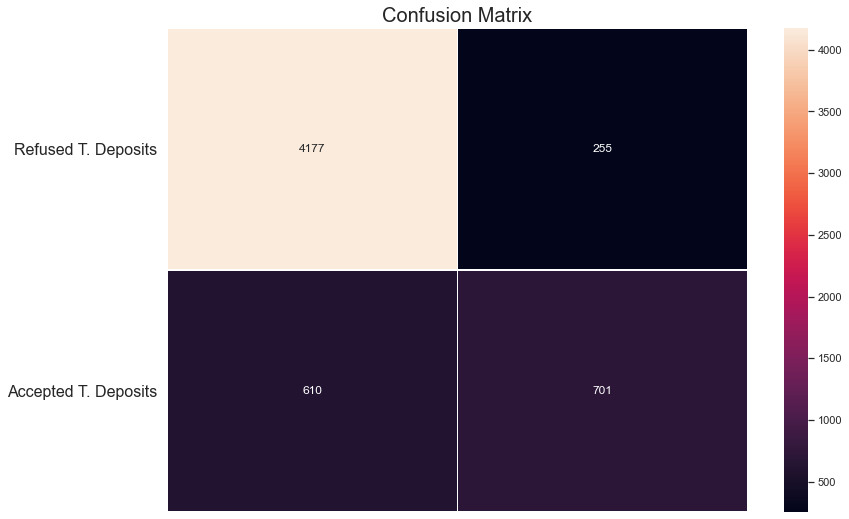

In [63]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

## Precision and Recall:

Recall: Is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect.

Precision: Means how sure is the prediction of our model that the actual label is a "Yes".

### Recall Precision Tradeoff:

As the precision gets higher the recall gets lower and vice versa. For instance, if we increase the precision from 30% to 60% the model is picking the predictions that the model believes is 60% sure. If there is an instance where the model believes that is 58% likely to be a potential client that will suscribe to a term deposit then the model will classify it as a "No." However, that instance was actually a "Yes" (potential client did suscribe to a term deposit.) That is why the higher the precision the more likely the model is to miss instances that are actually a "Yes"!

In [65]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_train, y_train_pred))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.7332635983263598
Recall Score:  0.5347063310450039


In [66]:
from sklearn.metrics import f1_score

# F1 score can be interpreted as a weighted averageof the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.
f1_score(y_train, y_train_pred)

0.6184384649316277

### Which Features Influence the Result of a Term Deposit Suscription?¶

Random Forest Classifier:
- The top three most important features for our classifier are **Duration (how long it took the conversation between the sales representative and the potential client), contact (number of contacts to the potential client within the same marketing campaign), month (the month of the year).

###  Random Forest  Classifier Wins!
Between Logistic Regression and Random Forest, Random Forest classifier is the best model to predict whether or not a potential client will suscribe to a term deposit or not. 84% accuracy!